In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
import matplotlib.cm as cm
from sklearn.cluster import SpectralClustering

### 272

In [2]:
# Ler dataset
# df = pd.read_csv('7483_patients.csv', header=None)
df = pd.read_csv('theano-to-tf/272-attentionhcare-271-codes_prediction.csv', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,0.008203,0.014516,0.031466,0.017424,0.080330,0.025959,0.017999,0.017794,0.018877,0.012647,...,0.000165,0.000165,0.000165,0.000165,0.000176,0.000165,0.000165,0.000165,0.000165,0.000165
1,0.006809,0.010090,0.049358,0.018168,0.005395,0.013164,0.017576,0.041369,0.059902,0.008779,...,0.000086,0.000086,0.000086,0.000086,0.000092,0.000086,0.000086,0.000086,0.000086,0.000086
2,0.006562,0.011789,0.029854,0.023033,0.015436,0.025509,0.041030,0.011638,0.047823,0.006095,...,0.000246,0.000246,0.000246,0.000246,0.000263,0.000246,0.000246,0.000246,0.000246,0.000246
3,0.010283,0.011917,0.029120,0.018023,0.038396,0.022285,0.012946,0.015664,0.017055,0.015113,...,0.000474,0.000474,0.000474,0.000474,0.000508,0.000473,0.000473,0.000473,0.000474,0.000474
4,0.005127,0.005776,0.048449,0.013804,0.019566,0.013340,0.039032,0.015285,0.019937,0.007501,...,0.000120,0.000120,0.000120,0.000120,0.000128,0.000120,0.000120,0.000120,0.000120,0.000120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


single - euclidean
single - cityblock
single - jaccard
single - minkowski
complete - euclidean
complete - cityblock
complete - jaccard
complete - minkowski
average - euclidean
average - cityblock
average - jaccard
average - minkowski
weighted - euclidean
weighted - cityblock
weighted - jaccard
weighted - minkowski
centroid - euclidean
centroid - cityblock
Invalid: centroid - cityblock
centroid - jaccard
Invalid: centroid - jaccard
centroid - minkowski
Invalid: centroid - minkowski
median - euclidean
median - cityblock
Invalid: median - cityblock
median - jaccard
Invalid: median - jaccard
median - minkowski
Invalid: median - minkowski
ward - euclidean
ward - cityblock
Invalid: ward - cityblock
ward - jaccard
Invalid: ward - jaccard
ward - minkowski
Invalid: ward - minkowski


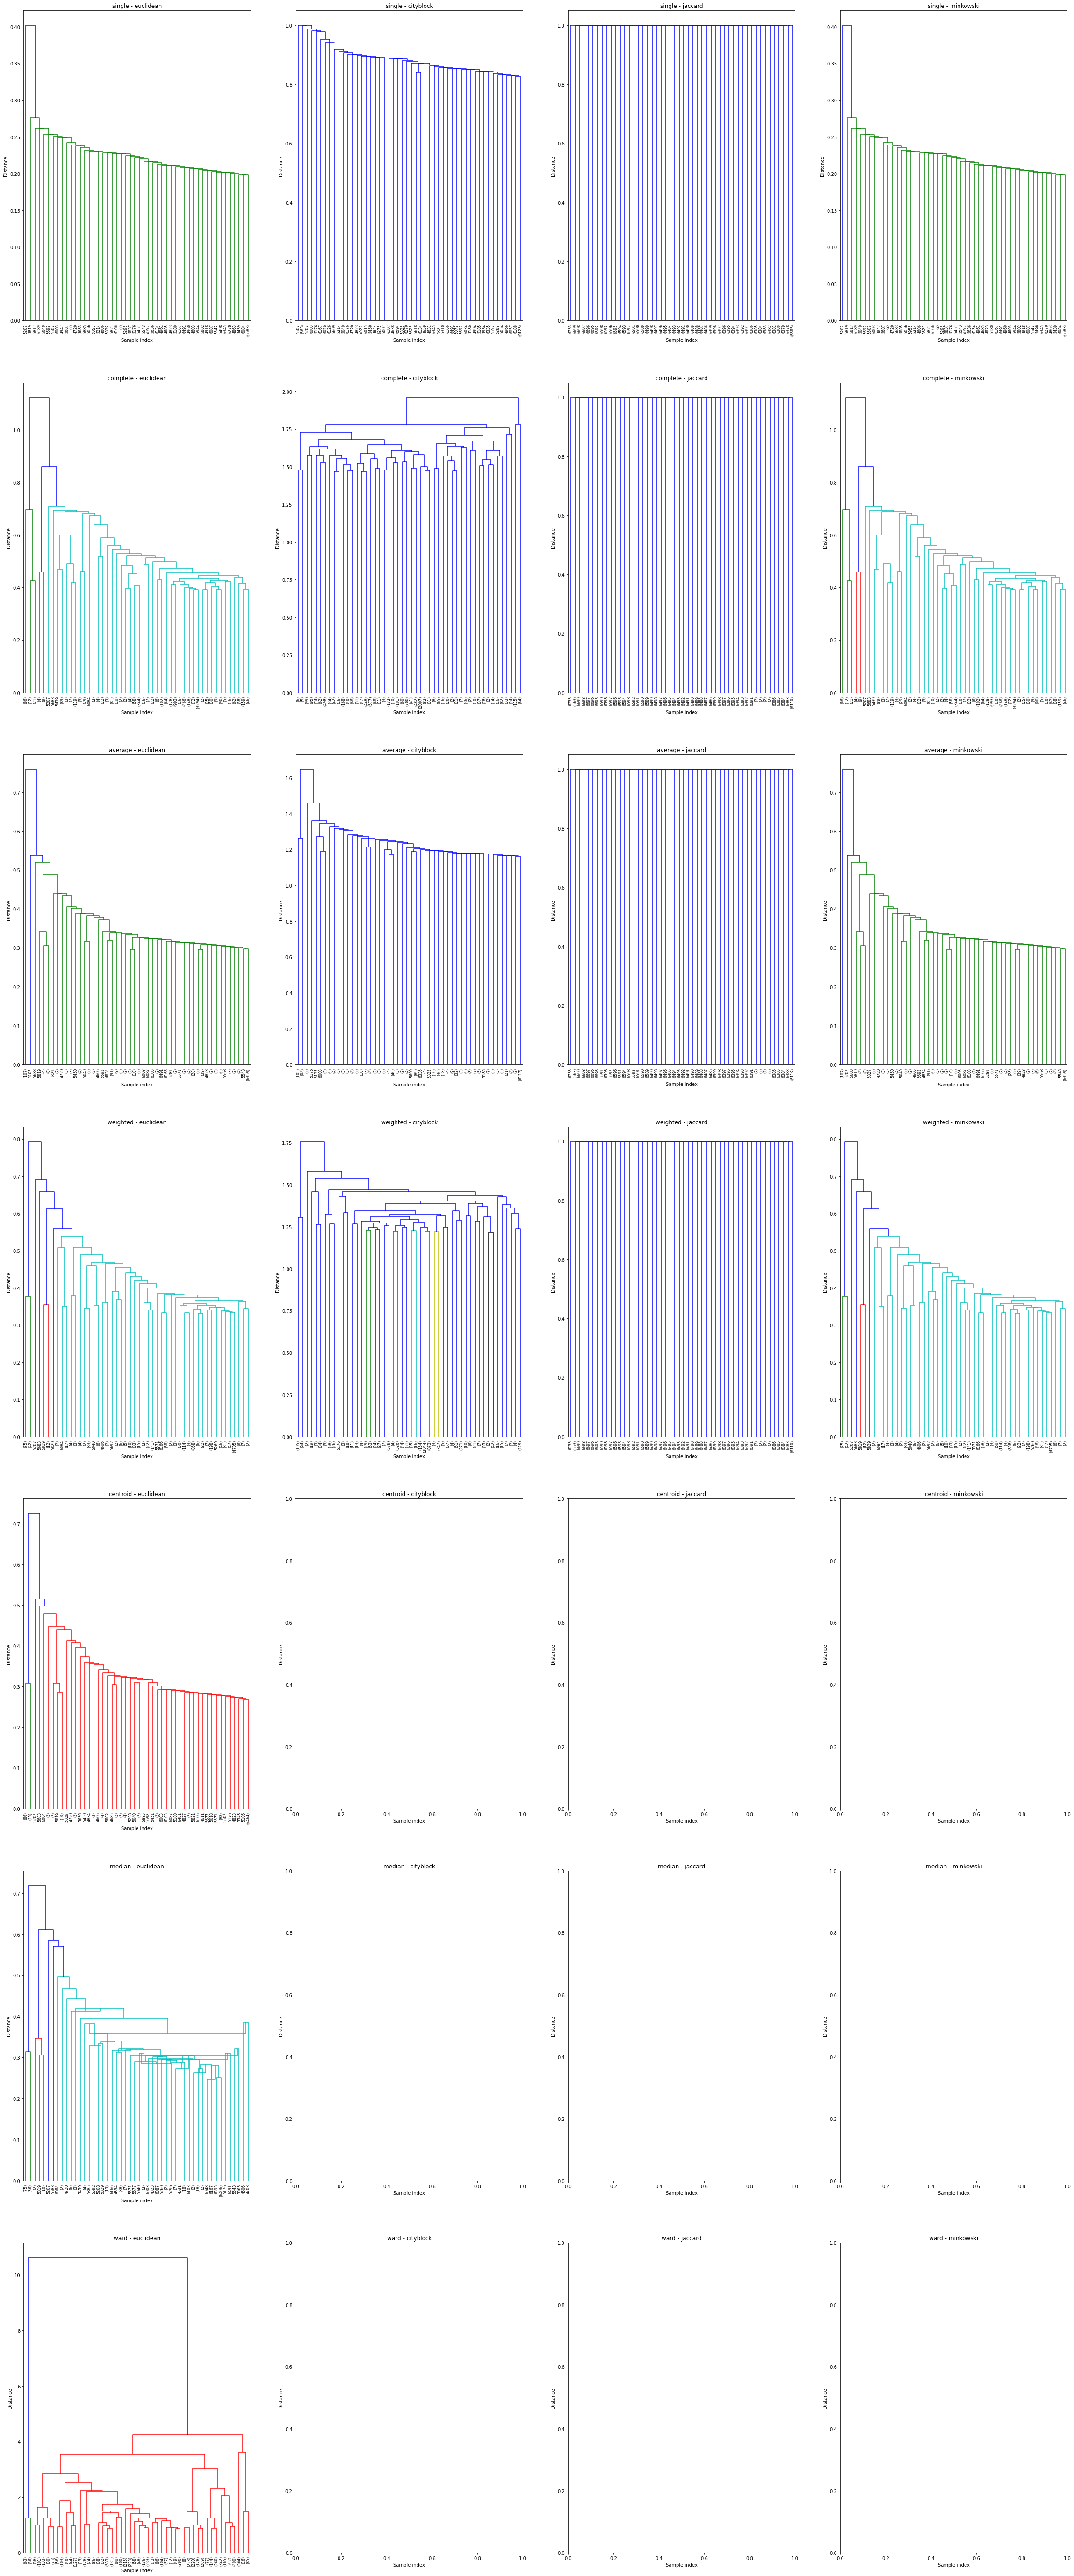

In [4]:
distances = ['euclidean', 'cityblock', 'jaccard', 'minkowski']
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

fig, axes = plt.subplots(7, 4, figsize=(40, 100))
plt.title('Hierarchical Clustering Dendrograms')

col = 0
row = 0
graphs = []
dns = []

for method in methods:
    for distance in distances:
        try:
            print(method + " - " + distance)
            Z = linkage(df, method=method, metric=distance)
            dn = dendrogram(Z, ax=axes[row, col], truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=8., orientation="top")
            axes[row, col].set_xlabel('Sample index')
            axes[row, col].set_ylabel('Distance')
            axes[row, col].set_title(method + " - " + distance)
            graphs.append(axes[row, col])
            dns.append(dn)
        except:
            axes[row, col].set_xlabel('Sample index')
            axes[row, col].set_ylabel('Distance')
            axes[row, col].set_title(method + " - " + distance)
            graphs.append(axes[row, col])
            print("Invalid: " + method + " - " + distance)
        col += 1
    row += 1
    col = 0

plt.show()

### 855 

In [8]:
# Ler dataset
# df = pd.read_csv('7483_patients.csv', header=None)
df = pd.read_csv('theano-to-tf/855-attentionhcare-271-codes_prediction.csv', header=None)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,845,846,847,848,849,850,851,852,853,854
0,0.039786,0.082047,0.075691,0.036474,0.010877,0.026668,0.032949,0.015972,0.039830,0.062410,...,0.000017,0.000020,0.000016,0.000018,0.000016,0.000016,0.000016,0.000018,0.000016,0.000017
1,0.000068,0.000093,0.000102,0.003332,0.000064,0.000119,0.000153,0.000068,0.000063,0.000131,...,0.000033,0.000040,0.000030,0.000036,0.000030,0.000030,0.000030,0.000036,0.000030,0.000034
2,0.006736,0.024076,0.019642,0.036183,0.036229,0.018040,0.014480,0.015866,0.008891,0.023715,...,0.000018,0.000022,0.000017,0.000019,0.000017,0.000017,0.000017,0.000019,0.000017,0.000018
3,0.095813,0.022103,0.022272,0.024300,0.007684,0.021688,0.031773,0.012483,0.015689,0.028134,...,0.000050,0.000061,0.000046,0.000054,0.000046,0.000046,0.000046,0.000054,0.000046,0.000052
4,0.010181,0.045869,0.051951,0.017779,0.061697,0.024660,0.015315,0.039596,0.046483,0.025956,...,0.000016,0.000020,0.000015,0.000018,0.000015,0.000015,0.000015,0.000018,0.000015,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6732,0.004858,0.004681,0.008420,0.033093,0.001064,0.061074,0.004949,0.003247,0.006302,0.001698,...,0.000024,0.000028,0.000022,0.000025,0.000022,0.000022,0.000022,0.000025,0.000022,0.000024


single - euclidean
single - cityblock
single - jaccard
single - minkowski
complete - euclidean
complete - cityblock
complete - jaccard
complete - minkowski
average - euclidean
average - cityblock
average - jaccard
average - minkowski
weighted - euclidean
weighted - cityblock
weighted - jaccard
weighted - minkowski
centroid - euclidean
centroid - cityblock
Invalid: centroid - cityblock
centroid - jaccard
Invalid: centroid - jaccard
centroid - minkowski
Invalid: centroid - minkowski
median - euclidean
median - cityblock
Invalid: median - cityblock
median - jaccard
Invalid: median - jaccard
median - minkowski
Invalid: median - minkowski
ward - euclidean
ward - cityblock
Invalid: ward - cityblock
ward - jaccard
Invalid: ward - jaccard
ward - minkowski
Invalid: ward - minkowski


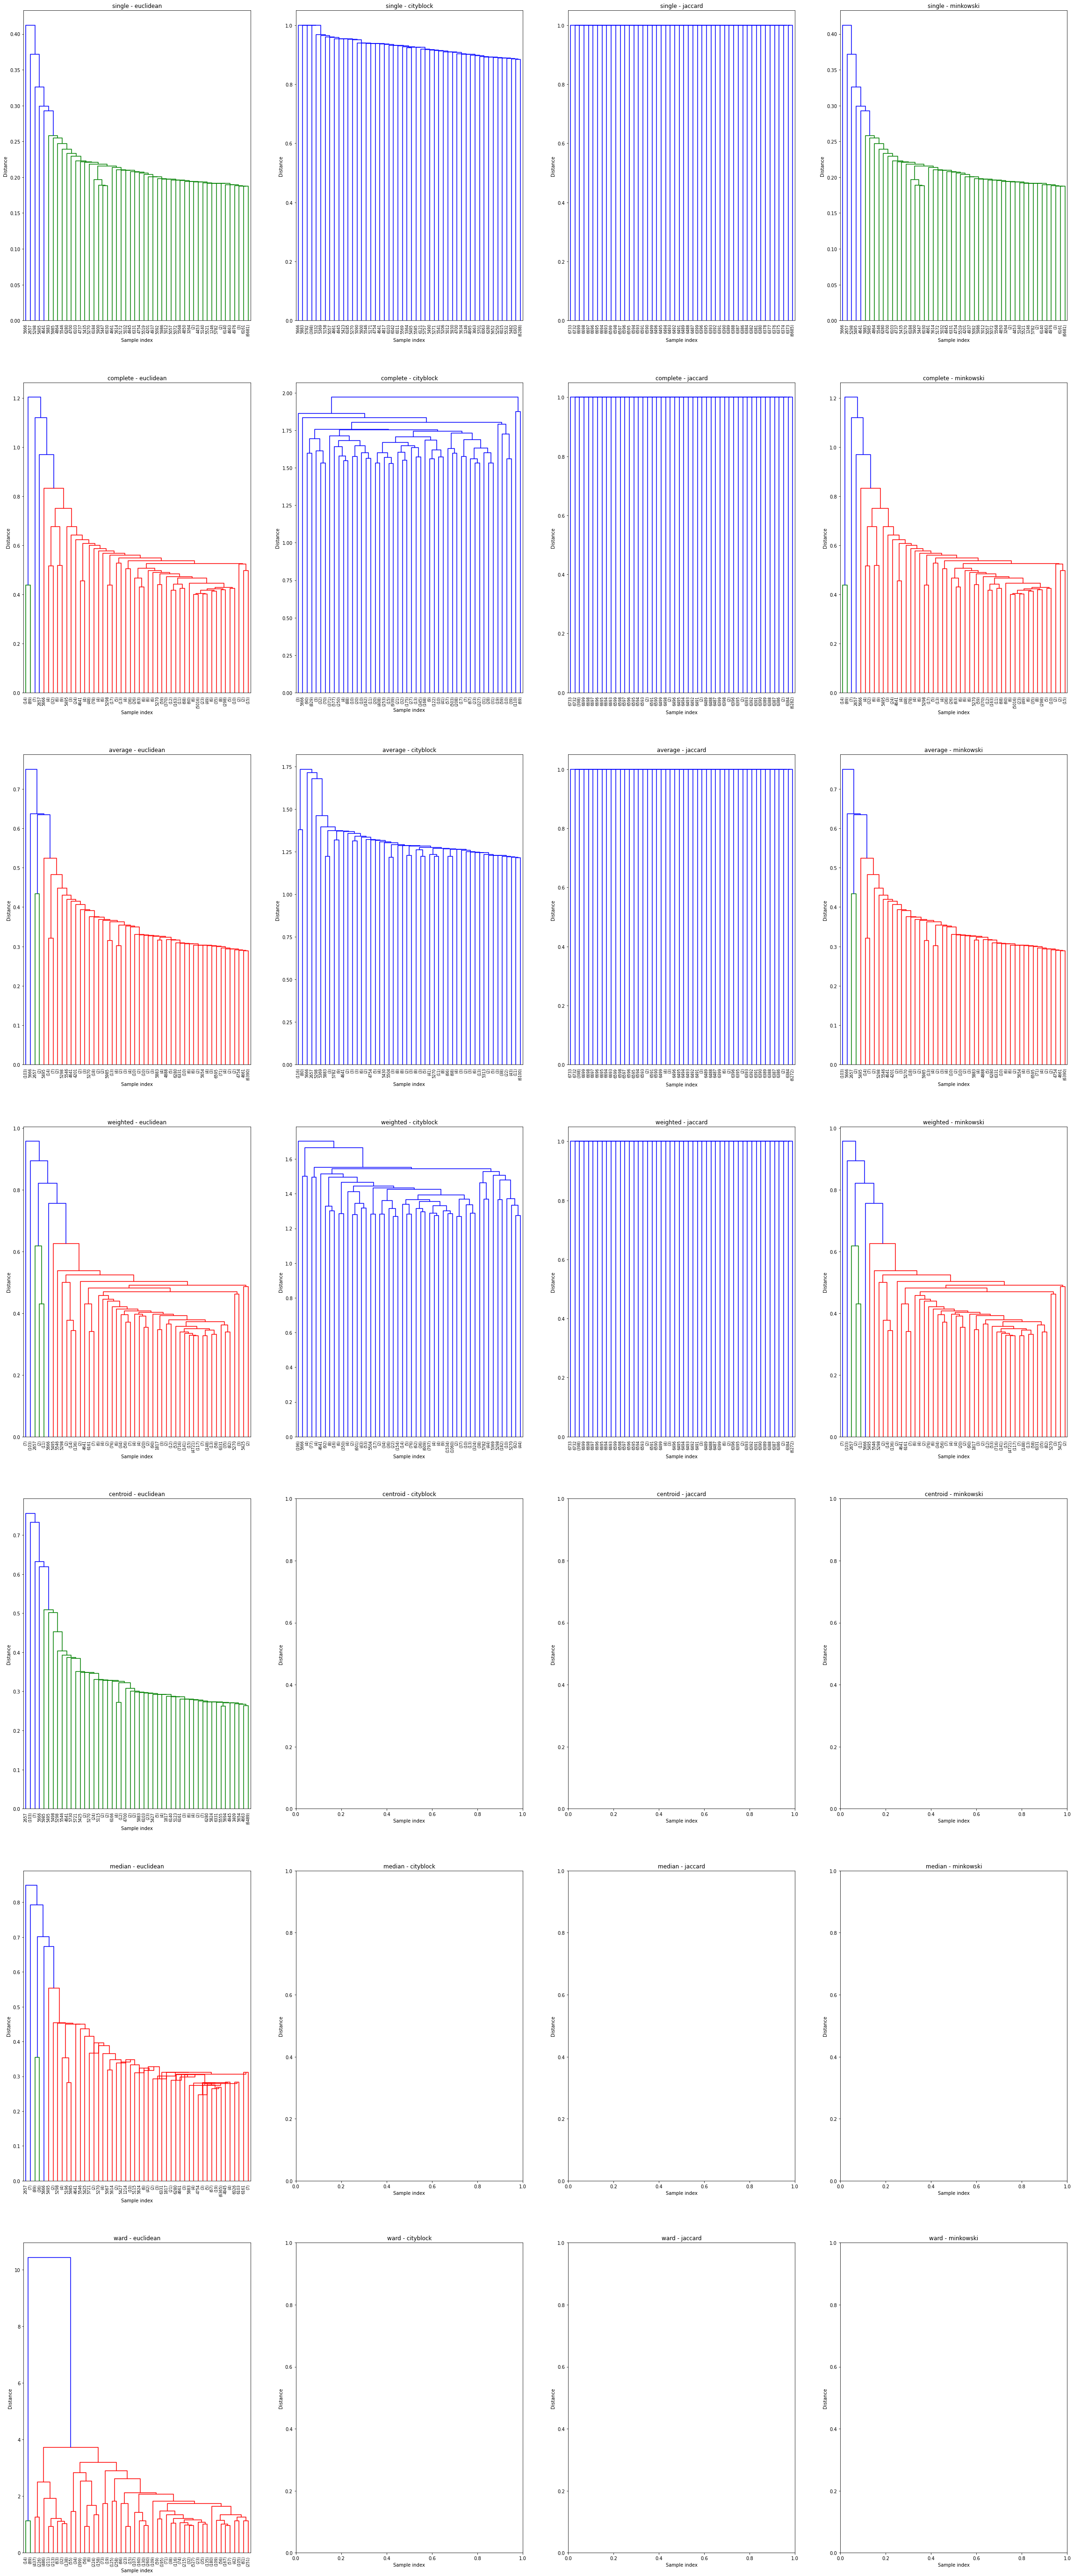

In [10]:
distances = ['euclidean', 'cityblock', 'jaccard', 'minkowski']
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

fig, axes = plt.subplots(7, 4, figsize=(40, 100))
plt.title('Hierarchical Clustering Dendrograms')

col = 0
row = 0
graphs = []
dns = []

for method in methods:
    for distance in distances:
        try:
            print(method + " - " + distance)
            Z = linkage(df, method=method, metric=distance)
            dn = dendrogram(Z, ax=axes[row, col], truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=8., orientation="top")
            axes[row, col].set_xlabel('Sample index')
            axes[row, col].set_ylabel('Distance')
            axes[row, col].set_title(method + " - " + distance)
            graphs.append(axes[row, col])
            dns.append(dn)
        except:
            axes[row, col].set_xlabel('Sample index')
            axes[row, col].set_ylabel('Distance')
            axes[row, col].set_title(method + " - " + distance)
            graphs.append(axes[row, col])
            print("Invalid: " + method + " - " + distance)
        col += 1
    row += 1
    col = 0

plt.show()